# Churn predictor

## EDA

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns


In [9]:
df_train = pd.read_csv(r"D:\Projects ML\churn_prediction\data\raw\customer_churn_dataset-training-master.csv")

In [10]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [32]:
df_train.shape

(440833, 12)

In [33]:
df_train.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [36]:
df_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [34]:
df_train.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [41]:
dtypes = df_train.dtypes
columns = df_train.columns
numeric_features = [] 
classification_features = []
for c in columns:
    if dtypes[c] == "object":
        numeric_features.append(c)
    else:
        classification_features.append(c)

print(numeric_features)
print(classification_features)

['Gender', 'Subscription Type', 'Contract Length']
['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [17]:
df_train[df_train.duplicated()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [43]:
df_train.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [44]:
df_train = df_train.dropna()

In [45]:
df_train.shape

(440832, 12)

In [50]:
df_train['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

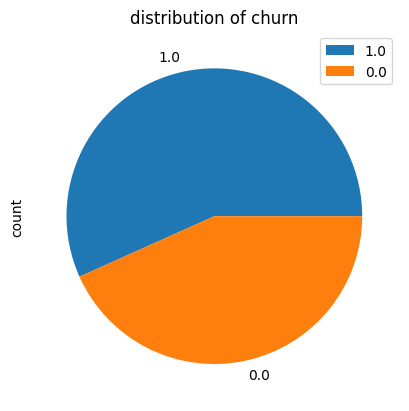

In [48]:
distrib = df_train['Churn'].value_counts().plot(kind='pie' , title='distribution of churn')
distrib.legend()

## Data Cleaning

In [49]:
df_train = df_train.drop(columns='CustomerID')

In [54]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df_train['Gender'] = gender_encoder.fit_transform(df_train['Gender'])

sub_encoder = LabelEncoder()
df_train['Subscription Type'] = sub_encoder.fit_transform(df_train['Subscription Type'])

contract_encoder = LabelEncoder()
df_train['Contract Length'] = contract_encoder.fit_transform(df_train['Contract Length'])

In [56]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [57]:
y = df_train['Churn']
X = df_train.drop(columns=['Churn'])

In [58]:
X_train , p , y_train , q = train_test_split(X,y,test_size=0.3,random_state=42)
X_val , X_test , y_val , y_test = train_test_split(p,q,test_size=0.3,random_state=42)


In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(308582, 10)
(308582,)
(92575, 10)
(92575,)
(39675, 10)
(39675,)


In [60]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)

## Model Training and evaluation

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100 , random_state=42)

In [62]:
model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_val)

In [64]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

conf_mat = confusion_matrix(y_pred=y_pred,y_true=y_val)
class_rep = classification_report(y_pred=y_pred,y_true=y_val)
acc = accuracy_score(y_pred=y_pred,y_true=y_val)

In [65]:
print(conf_mat)

[[40068     1]
 [   24 52482]]


In [66]:
print(class_rep)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     40069
         1.0       1.00      1.00      1.00     52506

    accuracy                           1.00     92575
   macro avg       1.00      1.00      1.00     92575
weighted avg       1.00      1.00      1.00     92575



In [67]:
print(acc)

0.9997299486902511


In [68]:
y_test_pred = model.predict(X_test)

In [69]:
conf_mat_test = confusion_matrix(y_pred=y_test_pred,y_true=y_test)
class_rep_test = classification_report(y_pred=y_test_pred,y_true=y_test)
acc_test = accuracy_score(y_pred=y_test_pred,y_true=y_test)

print(conf_mat_test)
print(class_rep_test)
print(acc_test)

[[17090     1]
 [   15 22569]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17091
         1.0       1.00      1.00      1.00     22584

    accuracy                           1.00     39675
   macro avg       1.00      1.00      1.00     39675
weighted avg       1.00      1.00      1.00     39675

0.9995967233774418


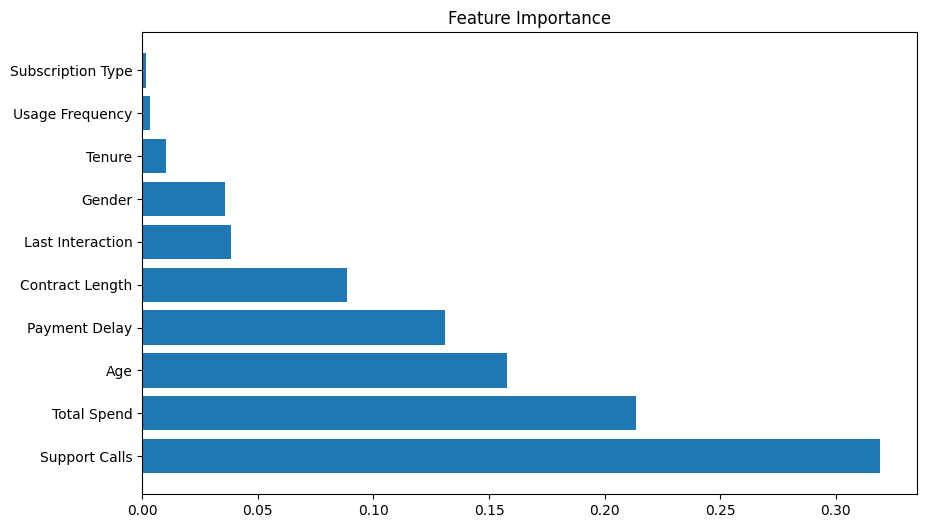

In [71]:
features = X.columns

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]),importances[indices])
plt.yticks(range(X.shape[1]),names)
plt.show()